Second maximum duration: 1656


AttributeError: module 'mplcursors' has no attribute 'cursor'

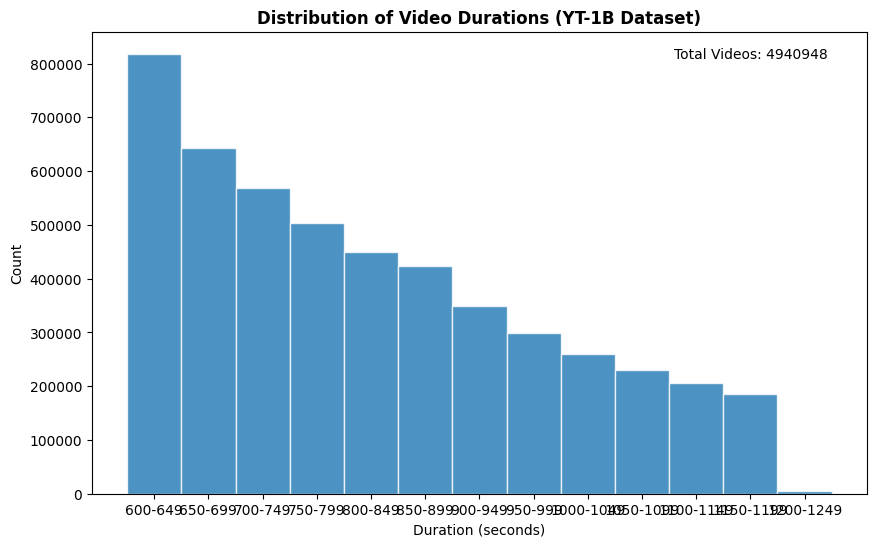

In [1]:
import os
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

def generate_plot(PATH, TITLE):
    # Plot the duration distribution using a bar chart
    durations = []

    for filename in os.listdir(PATH):
        if filename.endswith('.csv'):
            file_path = os.path.join(PATH, filename)
            
            with open(file_path, 'r') as csvfile:
                reader = csv.reader(csvfile)
                next(reader)  # Skip the header row
                for row in reader:
                    duration = int(row[1])
                    if duration >= 600:
                        durations.append(duration)

    if len(durations) >= 2:
        durations.sort(reverse=True)
        second_max_duration = durations[1]
        print("Second maximum duration:", second_max_duration)

    # Calculate histogram data
    hist_data, edges = np.histogram(durations, bins=range(600, 1260, 49))

    # Create bar chart using matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar([f"{edge}-{edge+49}" for edge in edges[:-1]], hist_data, edgecolor='white', color='#1f77b4', alpha=0.8, width=1)

    ax.set_title(TITLE, fontweight='bold')
    ax.set_xlabel('Duration (seconds)')
    ax.set_ylabel('Count')

    # Add total count of videos to the upper right corner
    ax.text(0.95, 0.95, f'Total Videos: {len(durations)}',
            horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)

    # Use mplcursors to enable tooltips on the bar chart
    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]}"))

    # Show the interactive plot
    plt.tight_layout()
    plt.show()


def main() -> int:
    generate_plot('/Users/jackgengqc/Desktop/Dr.Gedas/output',
                  'Distribution of Video Durations (YT-1B Dataset)')
    return 0


if __name__ == '__main__':
    sys.exit(main())
